In [2]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Narayanan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


C:\Users\Narayanan\AppData\Local\Temp\ipykernel_10564\279634297.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Score', palette='viridis')


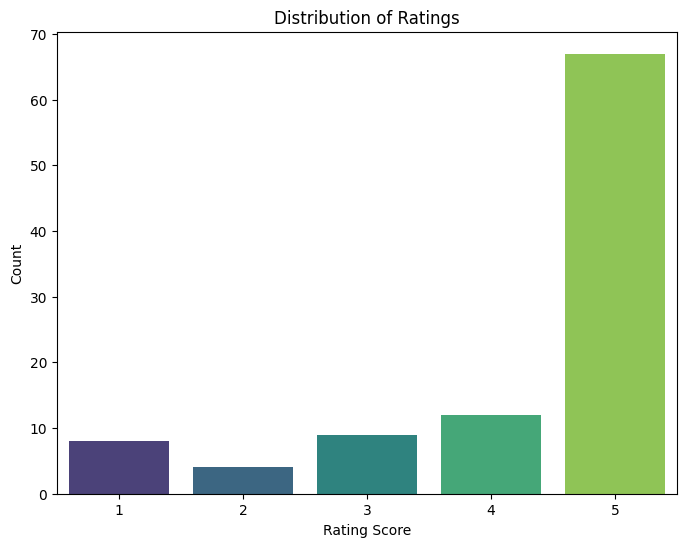

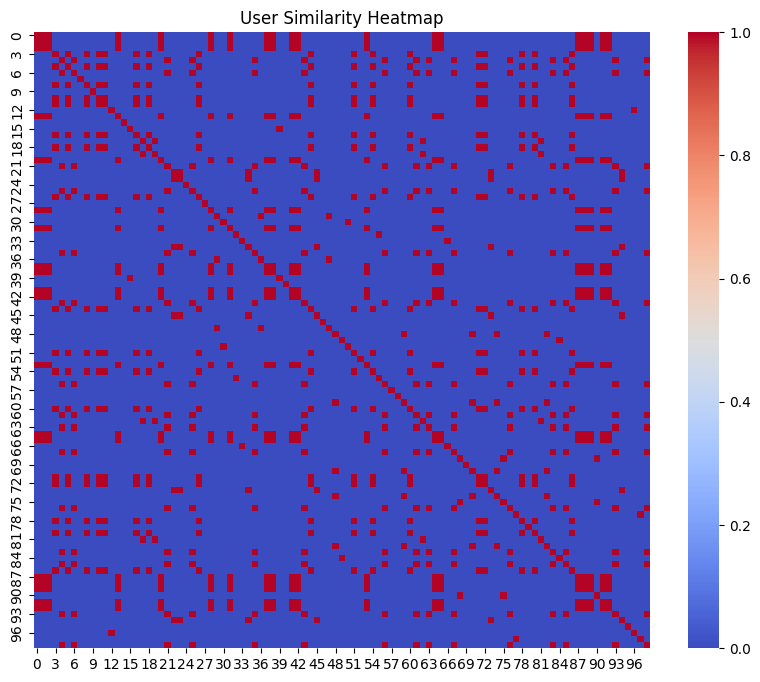

In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pymongo import MongoClient
from sklearn.metrics.pairwise import cosine_similarity

# MongoDB connection
client = MongoClient('localhost', 27017)
db = client['recommender_db']
collection = db['reviews']

# Fetch data from MongoDB
def fetch_data():
    cursor = collection.find()
    data = list(cursor)
    return pd.DataFrame(data)

# Load dataset
df = fetch_data()

# Data preprocessing
df = df.dropna(subset=['ProductId', 'UserId', 'Score'])
df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Visualization 1: Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Score', palette='viridis')
plt.title("Distribution of Ratings")
plt.xlabel("Rating Score")
plt.ylabel("Count")
plt.show()

# Visualization 2: User Similarity Matrix Heatmap
user_item_matrix = df.pivot_table(index='UserId', columns='ProductId', values='Score').fillna(0)
user_similarity = cosine_similarity(user_item_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(user_similarity, cmap='coolwarm', square=True)
plt.title("User Similarity Heatmap")
plt.show()


C:\Users\Narayanan\AppData\Local\Temp\ipykernel_10564\3009955579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='magma')


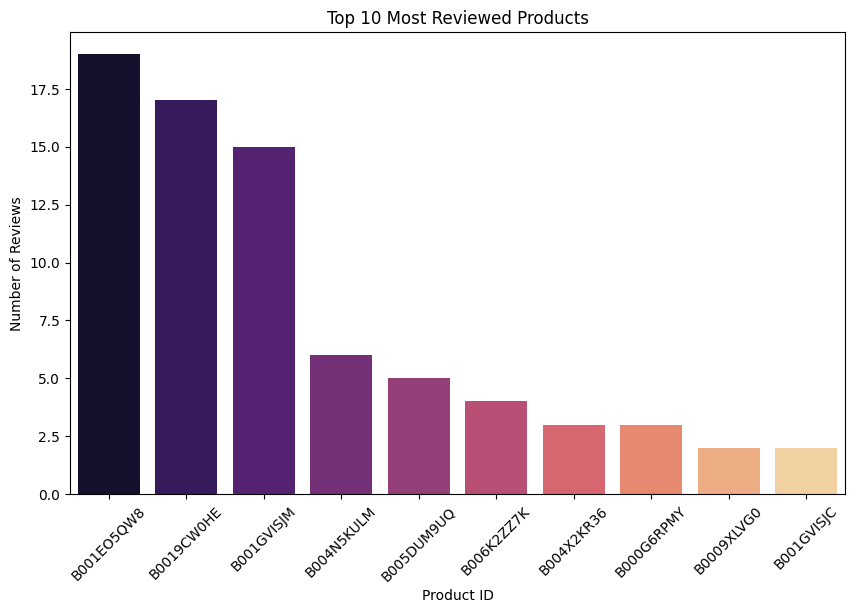

In [4]:
# Top 10 Most Reviewed Products
top_products = df['ProductId'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='magma')
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Product ID")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()


C:\Users\Narayanan\AppData\Local\Temp\ipykernel_10564\3316710383.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_per_product.index, y=avg_rating_per_product.values, palette='viridis')


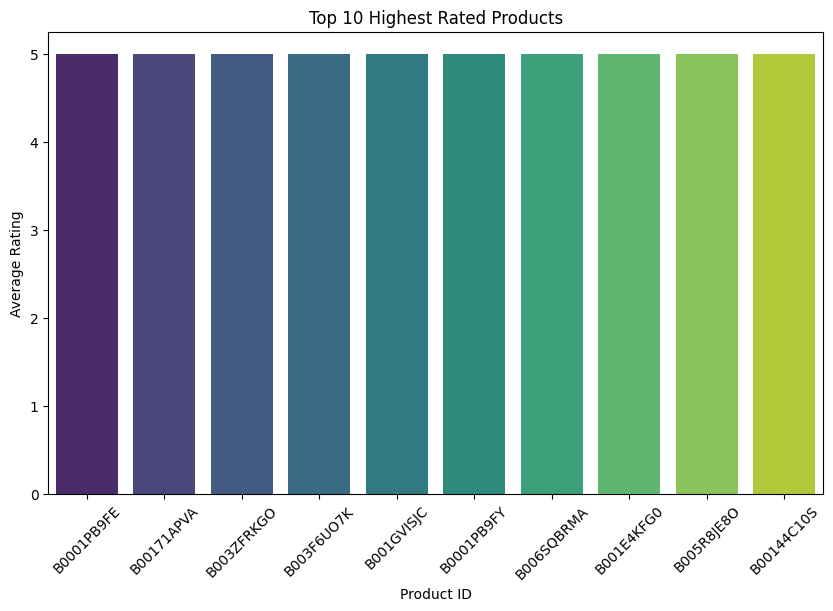

In [5]:
# Average Rating per Product
avg_rating_per_product = df.groupby('ProductId')['Score'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_per_product.index, y=avg_rating_per_product.values, palette='viridis')
plt.title("Top 10 Highest Rated Products")
plt.xlabel("Product ID")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


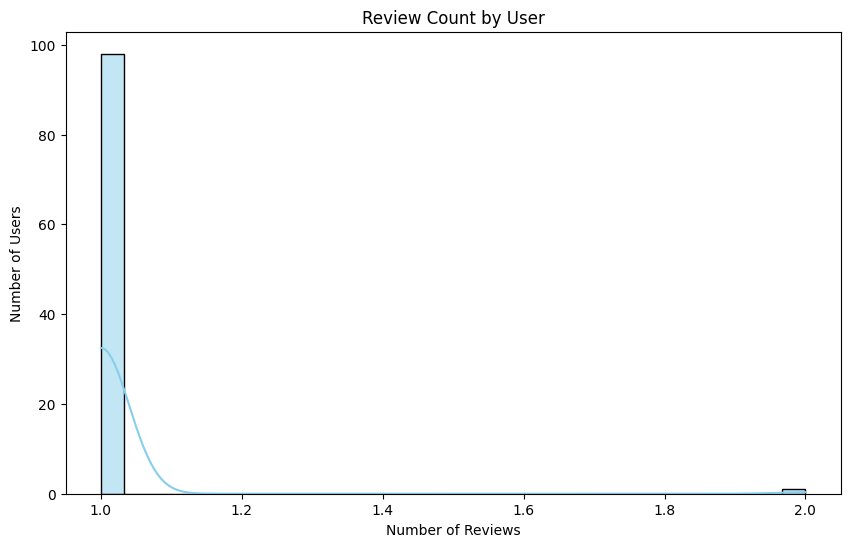

In [6]:
# Review Count by User
review_count_by_user = df['UserId'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(review_count_by_user, bins=30, kde=True, color='skyblue')
plt.title("Review Count by User")
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Users")
plt.show()


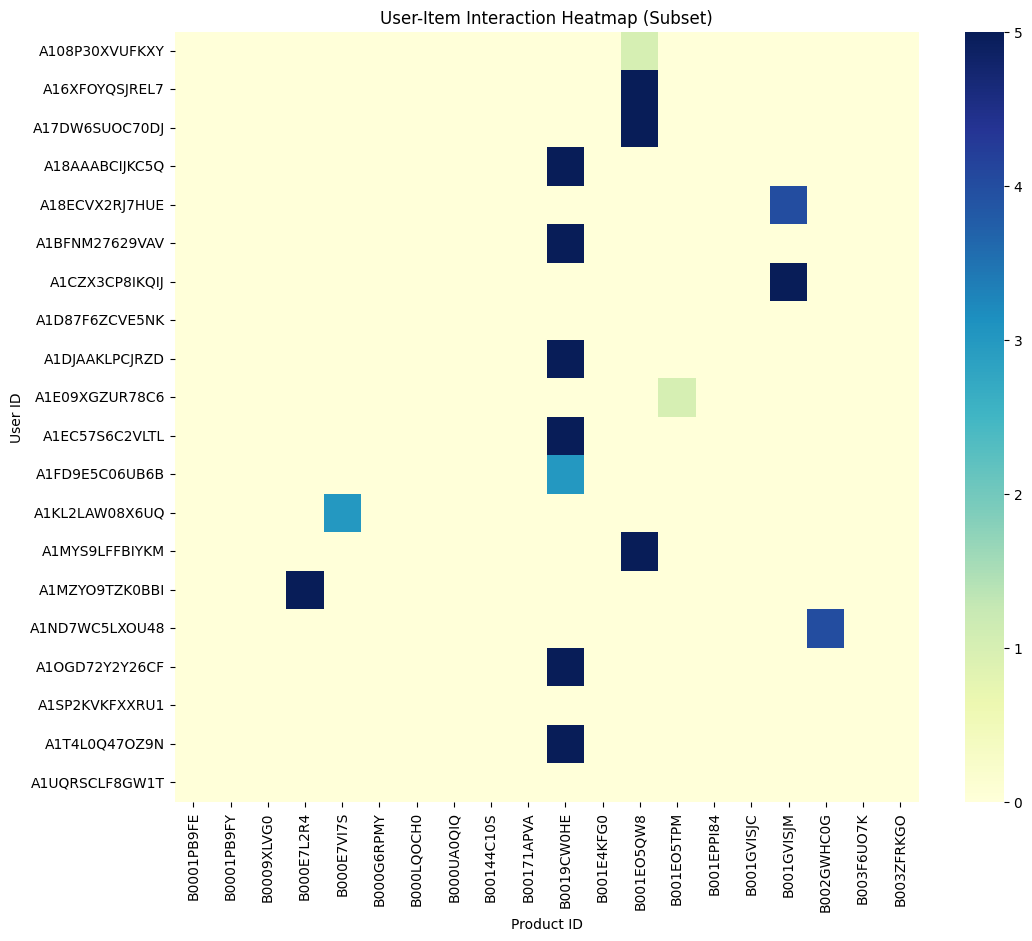

In [8]:
# User-Item Interaction Heatmap (showing a subset)
subset_user_item_matrix = user_item_matrix.iloc[:20, :20]  # Adjust the size as needed
plt.figure(figsize=(12, 10))
sns.heatmap(subset_user_item_matrix, cmap="YlGnBu", cbar=True)
plt.title("User-Item Interaction Heatmap (Subset)")
plt.xlabel("Product ID")
plt.ylabel("User ID")
plt.show()



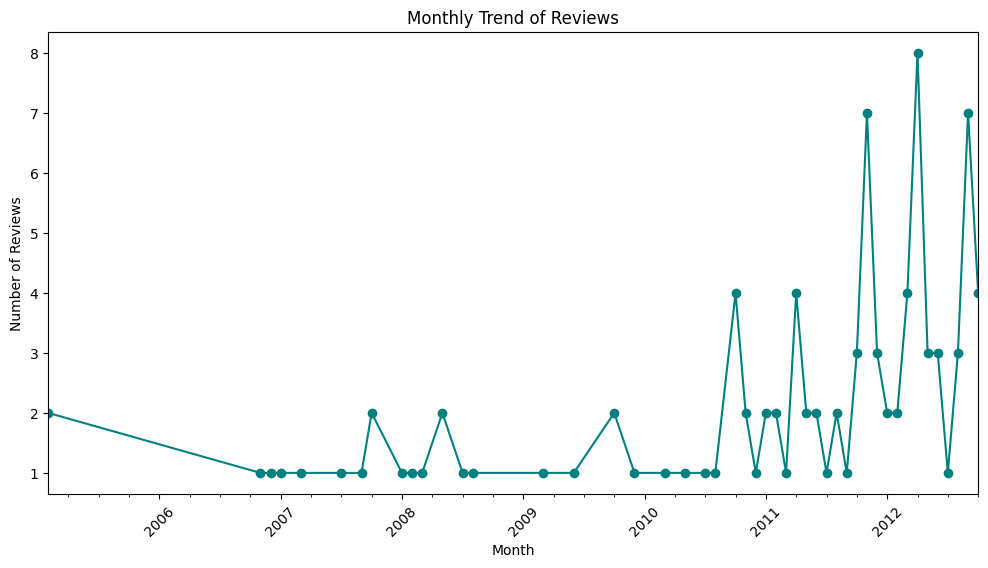

In [9]:
# Monthly Trend of Reviews
df['Month'] = df['Time'].dt.to_period('M')
monthly_reviews = df.groupby('Month').size()
plt.figure(figsize=(12, 6))
monthly_reviews.plot(kind='line', color='teal', marker='o')
plt.title("Monthly Trend of Reviews")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()
